# Collocation

# Data Preparation

## Loading data

本單元將依照政大資科黃瀚萱老師的教材建議採用一個較長文本《共產黨宣言（The Communist Manifesto）》來介紹Collocation，並測試能否找到一些該文本的特徵。該文件可由Project Gutenberg免費電子書處下載，你也可以下載其他的英文書籍來做測試，以觀察文本間的差異。

In [10]:
# using colab
!wget https://raw.githubusercontent.com/P4CSS/PSS/master/data/corpus02.txt -O corpus02.txt
with open("corpus02.txt", encoding="utf8") as fin:
    text = fin.read()
print("Number of characters: %d" % len(text))

zsh:1: command not found: wget


FileNotFoundError: [Errno 2] No such file or directory: 'corpus02.txt'

In [1]:
# github + jupyterlab
with open("data/corpus02.txt", encoding="utf8") as fin:
    text = fin.read()
print("Number of characters: %d" % len(text))

Number of characters: 75346


## Fundamental text processing

In [2]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# stopword_list = stopwords.words('english')

raw_tokens = word_tokenize(text)
tokens = []
for token in raw_tokens:
    if token.isalpha():
#         if token.lower() not in stopword_list: 
        tokens.append(token.lower())
print("Number of tokens: %d" % len(tokens))


Number of tokens: 11781


[nltk_data] Downloading package punkt to /Users/jirlong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
tokens[:20]

['manifesto',
 'of',
 'the',
 'communist',
 'party',
 'by',
 'karl',
 'marx',
 'and',
 'frederick',
 'engels',
 'a',
 'specter',
 'is',
 'haunting',
 'europe',
 'the',
 'specter',
 'of',
 'communism']

## Most Frequent Tokens: Term frequency

In [4]:
from collections import Counter
word_counts = Counter(tokens)
for w, c in word_counts.most_common(20):
    print("%s\t%d" % (w, c))

the	1167
of	801
and	360
in	299
to	279
a	173
is	138
that	128
by	123
class	104
with	101
it	100
bourgeois	99
all	98
bourgeoisie	92
as	86
for	84
they	83
its	81
their	80


# Collocation

## Conting most Frequent Collocations

In [5]:
word_pair_counts = Counter()
for i in range(len(tokens) - 1):
    (w1, w2) = (tokens[i], tokens[i + 1])
    word_pair_counts[(w1, w2)] += 1
    
for pair, c in word_pair_counts.most_common(20):
    print("%s\t%s\t%d" % (pair[0], pair[1], c))

of	the	244
in	the	91
the	bourgeoisie	66
the	proletariat	50
to	the	43
by	the	40
for	the	38
of	production	38
with	the	34
the	bourgeois	33
conditions	of	29
means	of	25
of	society	24
against	the	23
on	the	23
working	class	23
to	be	22
of	all	22
is	the	21
the	communists	21


## Show the content in word_pair_counts

In [6]:
print(word_pair_counts.most_common(1)[0])

(('of', 'the'), 244)


## Alternative way to get the contents in the pair.

In [7]:
for (w1, w2), c in word_pair_counts.most_common(20):
    print("%s\t%s\t%d" % (w1, w2, c))

of	the	244
in	the	91
the	bourgeoisie	66
the	proletariat	50
to	the	43
by	the	40
for	the	38
of	production	38
with	the	34
the	bourgeois	33
conditions	of	29
means	of	25
of	society	24
against	the	23
on	the	23
working	class	23
to	be	22
of	all	22
is	the	21
the	communists	21


## Removing stopwords

In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')

word_pair_nosw_counts = Counter()
for i in range(len(tokens) - 1):
    (w1, w2) = (tokens[i], tokens[i + 1])
    if w1 not in stopword_list and w2 not in stopword_list:
        word_pair_nosw_counts[(w1, w2)] += 1
    
for (w1, w2), c in word_pair_nosw_counts.most_common(20):
    print("%s\t%s\t%d" % (w1, w2, c))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jirlong/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


working	class	23
bourgeois	society	15
class	antagonisms	11
modern	industry	11
ruling	class	11
productive	forces	9
modern	bourgeois	8
middle	ages	7
bourgeois	property	7
private	property	7
feudal	society	6
middle	class	6
social	conditions	6
property	relations	6
class	struggle	6
old	society	6
petty	bourgeois	6
existing	society	5
one	word	5
bourgeois	socialism	5


# Distant Collocations

## Most frequent collocations with a distance of k

In [9]:
window_size = 9

word_pair_counts = Counter()
word_pair_distance_counts = Counter()
for i in range(len(tokens) - 1):
    for distance in range(1, window_size):
        if i + distance < len(tokens):
            w1 = tokens[i]
            w2 = tokens[i + distance]
            word_pair_distance_counts[(w1, w2, distance)] += 1
            word_pair_counts[(w1, w2)] += 1

print(len(word_pair_counts))
            
for (w1, w2, distance), c in word_pair_distance_counts.most_common(20):
    print("%s\t%s\t%d\t%d" % (w1, w2, distance, c))

53403
the	of	2	302
of	the	1	244
the	the	3	186
the	the	8	134
the	the	6	129
the	the	7	126
the	of	3	125
the	the	4	117
the	the	5	114
of	the	4	92
in	the	1	91
of	the	8	91
of	the	6	88
the	of	7	81
the	of	6	77
of	the	7	76
the	of	5	76
the	of	8	75
of	the	5	72
the	bourgeoisie	1	66


## Show an entry in word_pair_distance

In [10]:
print(word_pair_distance_counts.most_common(1)[0])

print(word_pair_distance_counts['the', 'of', 1])
print(word_pair_distance_counts['the', 'of', 100])


for distance in range(1, window_size):
    print("Occurrences of the word pair (%s, %s) with a distance of %d: %d" % (
        'the', 'of', distance, word_pair_distance_counts['the', 'of', distance]))

print("Occurrences of the usage 'the * * of'")
print(word_pair_distance_counts['the', 'of', 2])

print("Occurrences of the usage 'of * * the'")
print(word_pair_distance_counts['of', 'the', 2])

(('the', 'of', 2), 302)
3
0
Occurrences of the word pair (the, of) with a distance of 1: 3
Occurrences of the word pair (the, of) with a distance of 2: 302
Occurrences of the word pair (the, of) with a distance of 3: 125
Occurrences of the word pair (the, of) with a distance of 4: 59
Occurrences of the word pair (the, of) with a distance of 5: 76
Occurrences of the word pair (the, of) with a distance of 6: 77
Occurrences of the word pair (the, of) with a distance of 7: 81
Occurrences of the word pair (the, of) with a distance of 8: 75
Occurrences of the usage 'the * * of'
302
Occurrences of the usage 'of * * the'
27


## Filtering the collocations with mean distance

In [11]:
pair_mean_distances = Counter()

for (w1, w2, distance), c in word_pair_distance_counts.most_common():
    pair_mean_distances[(w1, w2)] += distance * (c / word_pair_counts[(w1, w2)])

for (w1, w2), distance in pair_mean_distances.most_common(20):
    print("%s\t%s\t%f\t%d" % (w1, w2, distance, word_pair_counts[(w1, w2)]))

of	destroyed	8.000000	3
to	petty	8.000000	3
necessarily	of	8.000000	3
in	communistic	8.000000	2
world	and	8.000000	2
and	existing	8.000000	2
is	slave	8.000000	2
an	each	8.000000	2
time	society	8.000000	2
an	communication	8.000000	2
every	we	8.000000	2
that	word	8.000000	2
bourgeoisie	market	8.000000	2
of	feet	8.000000	2
population	property	8.000000	2
at	these	8.000000	2
our	relations	8.000000	2
is	subsistence	8.000000	2
disposal	the	8.000000	2
wealth	bourgeoisie	8.000000	2


## Filtering one-time cases

In [12]:
pair_mean_distances = Counter()

for (w1, w2, distance), c in word_pair_distance_counts.most_common():
    if word_pair_counts[(w1, w2)] > 1:
        pair_mean_distances[(w1, w2)] += distance * (c / word_pair_counts[(w1, w2)])

for (w1, w2), distance in pair_mean_distances.most_common(20):
    print("%s\t%s\t%f\t%d" % (w1, w2, distance, word_pair_counts[(w1, w2)]))

of	destroyed	8.000000	3
to	petty	8.000000	3
necessarily	of	8.000000	3
in	communistic	8.000000	2
world	and	8.000000	2
and	existing	8.000000	2
is	slave	8.000000	2
an	each	8.000000	2
time	society	8.000000	2
an	communication	8.000000	2
every	we	8.000000	2
that	word	8.000000	2
bourgeoisie	market	8.000000	2
of	feet	8.000000	2
population	property	8.000000	2
at	these	8.000000	2
our	relations	8.000000	2
is	subsistence	8.000000	2
disposal	the	8.000000	2
wealth	bourgeoisie	8.000000	2


In [13]:
for (w1, w2), distance in pair_mean_distances.most_common()[-20:]:
    print("%s\t%s\t%f\t%d" % (w1, w2, distance, word_pair_counts[(w1, w2)]))

continued	existence	1.000000	2
complete	systems	1.000000	2
they	wish	1.000000	2
new	jerusalem	1.000000	2
every	revolutionary	1.000000	2
revolutionary	movement	1.000000	2
could	be	1.000000	2
and	others	1.000000	2
these	systems	1.000000	2
social	science	1.000000	2
most	suffering	1.000000	2
suffering	class	1.000000	2
antagonisms	they	1.000000	2
their	ends	1.000000	2
a	critical	1.000000	2
these	proposals	1.000000	2
chiefly	to	1.000000	2
they	support	1.000000	2
partly	of	1.000000	2
existing	social	1.000000	2


In [14]:
num_pairs = len(pair_mean_distances)
mid = num_pairs // 2
for (w1, w2), distance in pair_mean_distances.most_common()[mid-10:mid+10]:
    print("%s\t%s\t%f\t%d" % (w1, w2, distance, word_pair_counts[(w1, w2)]))

which	laborer	4.500000	2
in	bare	4.500000	2
a	existence	4.500000	2
means	appropriation	4.500000	2
intend	the	4.500000	2
personal	appropriation	4.500000	2
labor	appropriation	4.500000	2
and	leaves	4.500000	2
away	is	4.500000	2
is	far	4.500000	2
the	living	4.500000	2
to	accumulated	4.500000	2
increase	labor	4.500000	2
accumulated	is	4.500000	2
enrich	the	4.500000	2
past	society	4.500000	4
dominates	present	4.500000	2
the	person	4.500000	2
trade	selling	4.500000	2
but	selling	4.500000	2


## Filtering with offset deviation

In [15]:
pair_deviations = Counter()
for (w1, w2, distance), c in word_pair_distance_counts.most_common():
    if word_pair_counts[(w1, w2)] > 1:
        pair_deviations[(w1, w2)] += c * ((distance - pair_mean_distances[(w1, w2)]) ** 2)
    
for (w1, w2), dev_tmp in pair_deviations.most_common():
    s_2 = dev_tmp / (word_pair_counts[(w1, w2)] - 1)
    pair_deviations[(w1, w2)] = s_2 ** 0.5
    
for (w1, w2), dev in pair_deviations.most_common(20):
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))

the	branding	4.500000	4.949747	2
sketched	the	4.500000	4.949747	2
class	struggles	4.500000	4.949747	2
journeyman	in	4.500000	4.949747	2
in	almost	4.500000	4.949747	2
epochs	of	4.500000	4.949747	2
everywhere	a	4.500000	4.949747	2
old	bourgeois	4.500000	4.949747	2
navigation	and	4.500000	4.949747	2
vanished	in	4.500000	4.949747	2
the	giant	4.500000	4.949747	2
the	leaders	4.500000	4.949747	2
armies	the	4.500000	4.949747	2
its	capital	4.500000	4.949747	2
oppressed	class	4.500000	4.949747	2
the	executive	4.500000	4.949747	2
enthusiasm	of	4.500000	4.949747	2
of	egotistical	4.500000	4.949747	2
its	relation	4.500000	4.949747	2
ones	that	4.500000	4.949747	2


In [16]:
for (w1, w2), dev in pair_deviations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))    

being	class	4.000000	0.000000	2
most	suffering	1.000000	0.000000	2
suffering	class	1.000000	0.000000	2
antagonisms	they	1.000000	0.000000	2
the	appeal	6.000000	0.000000	2
they	ends	5.000000	0.000000	2
their	ends	1.000000	0.000000	2
a	critical	1.000000	0.000000	2
these	proposals	1.000000	0.000000	2
of	c	6.000000	0.000000	2
chiefly	to	1.000000	0.000000	2
chiefly	germany	2.000000	0.000000	2
communists	against	6.000000	0.000000	2
they	support	1.000000	0.000000	2
partly	of	1.000000	0.000000	2
partly	in	4.000000	0.000000	2
germany	fight	2.000000	0.000000	2
revolutionary	against	2.000000	0.000000	2
germany	immediately	8.000000	0.000000	2
existing	social	1.000000	0.000000	2


## With a higher supportive threshold

In [17]:
pair_deviations = Counter()
for (w1, w2, distance), c in word_pair_distance_counts.most_common():
    if word_pair_counts[(w1, w2)] > 10:
        pair_deviations[(w1, w2)] += c * ((distance - pair_mean_distances[(w1, w2)]) ** 2)
    
for (w1, w2), dev_tmp in pair_deviations.most_common():
    s_2 = dev_tmp / (word_pair_counts[(w1, w2)] - 1)
    pair_deviations[(w1, w2)] = s_2 ** 0.5
    
for (w1, w2), dev in pair_deviations.most_common()[-20:]:
    print("%s\t%s\t%f\t%f\t%d" % (w1, w2, pair_mean_distances[(w1, w2)], dev, word_pair_counts[(w1, w2)]))

be	and	3.833333	1.466804	12
have	of	5.869565	1.455533	23
to	be	1.416667	1.442120	24
the	communism	4.454545	1.439697	11
of	can	5.000000	1.414214	11
in	but	5.000000	1.414214	11
for	a	2.076923	1.382120	13
for	class	5.363636	1.361817	11
as	and	5.153846	1.344504	13
has	of	5.730769	1.343360	26
it	has	1.409091	1.333063	22
working	class	1.360000	1.319091	25
in	class	5.272727	1.272078	11
bourgeois	society	1.312500	1.250000	16
it	of	6.088235	1.239933	34
by	means	1.692308	0.947331	13
in	proportion	1.500000	0.904534	12
they	are	1.250000	0.866025	12
modern	industry	1.166667	0.577350	12
ruling	class	1.000000	0.000000	11


# Pearson's Chi-Square Test

## Back to bigrams

In [18]:
word_pair_counts = Counter()
word_counts = Counter(tokens)
num_bigrams = 0

for i in range(len(tokens) - 1):
    w1 = tokens[i]
    w2 = tokens[i + 1]
    word_pair_counts[(w1, w2)] += 1
    num_bigrams += 1
print(num_bigrams)

11780


## Chi-Square function

In [19]:
def chisquare(o11, o12, o21, o22):
    n = o11 + o12 + o21 + o22
    x_2 = (n * ((o11 * o22 - o12 * o21)**2)) / ((o11 + o12) * (o11 + o21) * (o12 + o22) * (o21 + o22)) 
    return x_2

## Now we can compute the chi-squares.

In [20]:
pair_chi_squares = Counter()
for (w1, w2), w1_w2_count in word_pair_counts.most_common():
    w1_only_count = word_counts[w1] - w1_w2_count
    w2_only_count = word_counts[w2] - w1_w2_count
    rest_count = num_bigrams - w1_only_count - w2_only_count - w1_w2_count
    pair_chi_squares[(w1, w2)] = chisquare(w1_w2_count, w1_only_count, w2_only_count, rest_count)

for (w1, w2), x_2 in pair_chi_squares.most_common(20):
    print("%s\t%s\t%d\t%f" % (w1, w2, word_pair_counts[(w1, w2)], x_2))
    

third	estate	2	11780.000000
constitution	adapted	2	11780.000000
karl	marx	1	11780.000000
frederick	engels	1	11780.000000
czar	metternich	1	11780.000000
police	spies	1	11780.000000
nursery	tale	1	11780.000000
italian	flemish	1	11780.000000
danish	languages	1	11780.000000
plebeian	lord	1	11780.000000
complicated	arrangement	1	11780.000000
manifold	gradation	1	11780.000000
patricians	knights	1	11780.000000
knights	plebeians	1	11780.000000
journeymen	apprentices	1	11780.000000
subordinate	gradations	1	11780.000000
cape	opened	1	11780.000000
proper	serving	1	11780.000000
left	remaining	1	11780.000000
heavenly	ecstacies	1	11780.000000


## Focus on more frequent bigrams

In [21]:
pair_chi_squares = Counter()
for (w1, w2), w1_w2_count in word_pair_counts.most_common():
    if w1_w2_count > 5:
        w1_only_count = word_counts[w1] - w1_w2_count
        w2_only_count = word_counts[w2] - w1_w2_count
        rest_count = num_bigrams - w1_only_count - w2_only_count - w1_w2_count
        pair_chi_squares[(w1, w2)] = chisquare(w1_w2_count, w1_only_count, w2_only_count, rest_count)

for (w1, w2), x_2 in pair_chi_squares.most_common(20):
    print("%s\t%s\t%d\t%f" % (w1, w2, word_pair_counts[(w1, w2)], x_2))
    

productive	forces	9	9636.544203
middle	ages	7	4928.714781
no	longer	14	4150.496033
working	class	23	2477.732678
modern	industry	11	1128.037662
class	antagonisms	11	1042.736309
private	property	7	1022.522314
ruling	class	11	966.767323
can	not	9	775.745125
their	own	11	759.449519
proportion	as	8	720.619853
have	been	7	702.438620
it	has	20	652.817376
away	with	8	563.758348
to	be	22	468.075784
just	as	6	439.987822
of	the	244	406.859323
the	bourgeoisie	66	397.199063
its	own	8	392.296908
petty	bourgeois	6	381.069314


In [22]:
for (w1, w2), x_2 in pair_chi_squares.most_common()[-20:]:
    print("%s\t%s\t%d\t%f" % (w1, w2, word_pair_counts[(w1, w2)], x_2))

is	the	21	4.412587
and	by	7	2.913108
at	the	7	2.592918
and	that	7	2.542680
be	the	7	2.367553
proletariat	the	10	2.357617
bourgeois	the	6	1.654642
that	of	6	0.910970
and	of	20	0.906966
of	class	9	0.569228
bourgeoisie	the	7	0.548588
that	the	15	0.476118
of	its	7	0.436822
and	in	11	0.401790
society	the	6	0.307430
all	the	11	0.192300
the	property	6	0.041125
and	to	9	0.027804
the	class	10	0.009971
class	the	10	0.009971


## Now we can filtering out the stopwords

In [23]:
pair_chi_squares = Counter()
for (w1, w2), w1_w2_count in word_pair_counts.most_common():
    if w1_w2_count > 1 and w1 not in stopword_list and w2 not in stopword_list:
        w1_only_count = word_counts[w1] - w1_w2_count
        w2_only_count = word_counts[w2] - w1_w2_count
        rest_count = num_bigrams - w1_only_count - w2_only_count - w1_w2_count
        pair_chi_squares[(w1, w2)] = chisquare(w1_w2_count, w1_only_count, w2_only_count, rest_count)

for (w1, w2), x_2 in pair_chi_squares.most_common(20):
    print("%s\t%s\t%d\t%f" % (w1, w2, word_pair_counts[(w1, w2)], x_2))

third	estate	2	11780.000000
constitution	adapted	2	11780.000000
productive	forces	9	9636.544203
eternal	truths	3	8834.249809
corporate	guilds	2	7852.666553
absolute	monarchy	4	7537.599406
eighteenth	century	3	7066.799694
immense	majority	3	6624.749575
laid	bare	2	5888.999830
distinctive	feature	2	5234.221968
torn	asunder	2	5234.221968
middle	ages	7	4928.714781
radical	rupture	2	4710.799796
buying	disappears	2	3925.333107
let	us	3	3310.499278
upper	hand	2	2943.499745
commercial	crises	2	2943.499745
various	stages	2	2943.499745
united	action	3	2942.749427
raw	material	2	2616.221958


In [24]:
for (w1, w2), x_2 in pair_chi_squares.most_common()[-20:]:
    print("%s\t%s\t%d\t%f" % (w1, w2, word_pair_counts[(w1, w2)], x_2))

many	bourgeois	2	49.412739
bourgeois	private	2	44.087627
petty	bourgeoisie	2	43.023037
modern	working	2	41.985003
bourgeois	freedom	2	39.732201
revolutionary	proletariat	2	35.100229
old	conditions	2	32.566311
feudal	property	2	31.386462
old	property	2	28.685615
bourgeois	revolution	2	26.136797
modern	bourgeoisie	3	21.380029
whole	bourgeoisie	2	20.752016
revolutionary	class	2	20.224783
bourgeois	state	2	17.063629
every	class	2	16.075081
bourgeois	conditions	3	16.040705
bourgeois	form	2	14.680146
one	class	2	10.562861
bourgeois	production	2	5.662454
bourgeois	class	3	5.261506


# Mutual Information

## Define a function for computing mutual information

In [25]:
import math
def mutual_information(w1_w2_prob, w1_prob, w2_prob):
    return math.log2(w1_w2_prob / (w1_prob * w2_prob))

In [26]:
num_unigrams = sum(word_counts.values())

pair_mutual_information_scores = Counter()
for (w1, w2), w1_w2_count in word_pair_counts.most_common():
    if w1_w2_count > 0:
        w1_prob = word_counts[w1] / num_unigrams
        w2_prob = word_counts[w2] / num_unigrams
        w1_w2_prob = w1_w2_count / num_bigrams
        pair_mutual_information_scores[(w1, w2)] = mutual_information(w1_w2_prob, w1_prob, w2_prob)

for (w1, w2), mi in pair_mutual_information_scores.most_common(20):
    print("%s\t%s\t%d\t%f" % (w1, w2, word_pair_counts[(w1, w2)], mi))

karl	marx	1	13.524297
frederick	engels	1	13.524297
czar	metternich	1	13.524297
police	spies	1	13.524297
nursery	tale	1	13.524297
italian	flemish	1	13.524297
danish	languages	1	13.524297
plebeian	lord	1	13.524297
complicated	arrangement	1	13.524297
manifold	gradation	1	13.524297
patricians	knights	1	13.524297
knights	plebeians	1	13.524297
journeymen	apprentices	1	13.524297
subordinate	gradations	1	13.524297
cape	opened	1	13.524297
proper	serving	1	13.524297
left	remaining	1	13.524297
heavenly	ecstacies	1	13.524297
chivalrous	enthusiasm	1	13.524297
egotistical	calculation	1	13.524297


In [27]:
num_unigrams = sum(word_counts.values())

pair_mutual_information_scores = Counter()
for (w1, w2), w1_w2_count in word_pair_counts.most_common():
    if w1_w2_count > 5:
        w1_prob = word_counts[w1] / num_unigrams
        w2_prob = word_counts[w2] / num_unigrams
        w1_w2_prob = w1_w2_count / num_bigrams
        pair_mutual_information_scores[(w1, w2)] = mutual_information(w1_w2_prob, w1_prob, w2_prob)

for (w1, w2), mi in pair_mutual_information_scores.most_common(20):
    print("%s\t%s\t%d\t%f" % (w1, w2, word_pair_counts[(w1, w2)], mi))

productive	forces	9	10.064865
middle	ages	7	9.461287
no	longer	14	8.215308
private	property	7	7.202369
working	class	23	6.762457
modern	industry	11	6.699483
have	been	7	6.669874
class	antagonisms	11	6.582849
proportion	as	8	6.513070
ruling	class	11	6.475934
can	not	9	6.453431
just	as	6	6.223563
away	with	8	6.165646
their	own	11	6.138238
petty	bourgeois	6	6.020471
middle	class	6	5.708380
its	own	8	5.660885
property	relations	6	5.658048
not	only	7	5.550292
class	struggle	6	5.321357


## Now we can filtering out the collocations containing stopwords

In [28]:
num_unigrams = sum(word_counts.values())

pair_mutual_information_scores = Counter()
for (w1, w2), w1_w2_count in word_pair_counts.most_common():
    if w1_w2_count > 1 and w1 not in stopword_list and w2 not in stopword_list:
        w1_prob = word_counts[w1] / num_unigrams
        w2_prob = word_counts[w2] / num_unigrams
        w1_w2_prob = w1_w2_count / num_bigrams
        pair_mutual_information_scores[(w1, w2)] = mutual_information(w1_w2_prob, w1_prob, w2_prob)

for (w1, w2), mi in pair_mutual_information_scores.most_common(20):
    print("%s\t%s\t%d\t%f" % (w1, w2, word_pair_counts[(w1, w2)], mi))

third	estate	2	12.524297
constitution	adapted	2	12.524297
corporate	guilds	2	11.939334
eternal	truths	3	11.524297
laid	bare	2	11.524297
distinctive	feature	2	11.354372
torn	asunder	2	11.354372
eighteenth	century	3	11.202369
radical	rupture	2	11.202369
immense	majority	3	11.109259
buying	disappears	2	10.939334
absolute	monarchy	4	10.880441
upper	hand	2	10.524297
commercial	crises	2	10.524297
various	stages	2	10.524297
earlier	epochs	2	10.354372
raw	material	2	10.354372
complete	systems	2	10.354372
guild	masters	2	10.202369
best	possible	2	10.202369


In [29]:
%who

Counter	 c	 chisquare	 dev	 dev_tmp	 distance	 fin	 i	 math	 
mi	 mid	 mutual_information	 nltk	 num_bigrams	 num_pairs	 num_unigrams	 pair	 pair_chi_squares	 
pair_deviations	 pair_mean_distances	 pair_mutual_information_scores	 raw_tokens	 rest_count	 s_2	 stopword_list	 stopwords	 text	 
token	 tokens	 w	 w1	 w1_only_count	 w1_prob	 w1_w2_count	 w1_w2_prob	 w2	 
w2_only_count	 w2_prob	 window_size	 word_counts	 word_pair_counts	 word_pair_distance_counts	 word_pair_nosw_counts	 word_tokenize	 x_2	 



# Visualization

[Visualizing Networks in Python](https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259)

In [30]:
import pandas as pd
# df = pd.DataFrame(pair_mutual_information_scores) # ERROR
li = [(w1, w2, word_pair_counts[(w1, w2)], mi) for (w1, w2), mi in pair_mutual_information_scores.most_common()]
df = pd.DataFrame.from_records(li, columns =['w1', 'w2', 'count', 'mi'])
df

,w1,w2,count,mi
0,third,estate,2,12.524297
1,constitution,adapted,2,12.524297
2,corporate,guilds,2,11.939334
3,eternal,truths,3,11.524297
4,laid,bare,2,11.524297
...,...,...,...,...
142,modern,bourgeoisie,3,3.159433
143,bourgeois,conditions,3,2.836047
144,one,class,2,2.823857
145,bourgeois,production,2,2.194501


In [47]:
import networkx as nx
G = nx.from_pandas_edgelist(df,
                            source = 'w1',
                            target = 'w2',
                            edge_attr = 'mi')

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

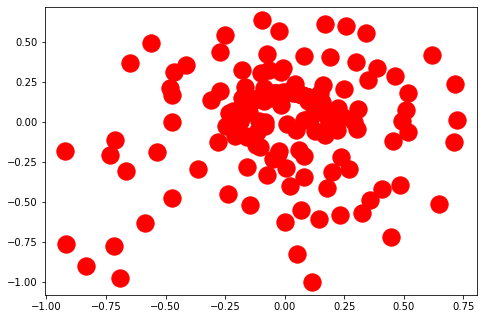

In [51]:
nx.draw_kamada_kawai(G)
# nx.draw_spring(G.to_directed())

In [52]:
# !pip install pyvis
from pyvis.network import Network
net = Network('1024px', '2048px', notebook=True)
net.from_nx(G)
net.show("test.html")

# Question

1. 與Mutual Information相比，Frequency based 的缺點是什什 麼?
2. 處理理 metamorphosis_franz_kafka.txt，找出三種 collocations
    * Frequency-based 
    * Chi-square test 
    * Mutual information
3. metamorphosis_franz_kafka.txt 裡有很多對話或⾃自⾔言⾃自語，⽤用雙 引號區別。請只⽤用括號裡的⽂文字，建立collocations

```
"Oh, God", he thought, "what a strenuous career it is that I’ve chosen! Travelling day in and day out. Doing business like this takes much more effort than doing your own business at home, and on top of that there's the curse of travelling, worries about making train connections, bad and irregular food, contact with different people all the time so that you can never get to know anyone or become friendly with them. It can all go to Hell!" He felt a slight itch up on his belly; pushed himself slowly up on his back towards the headboard so that he could lift his head better;
```